## Aluno: Fernando Gomes Papi

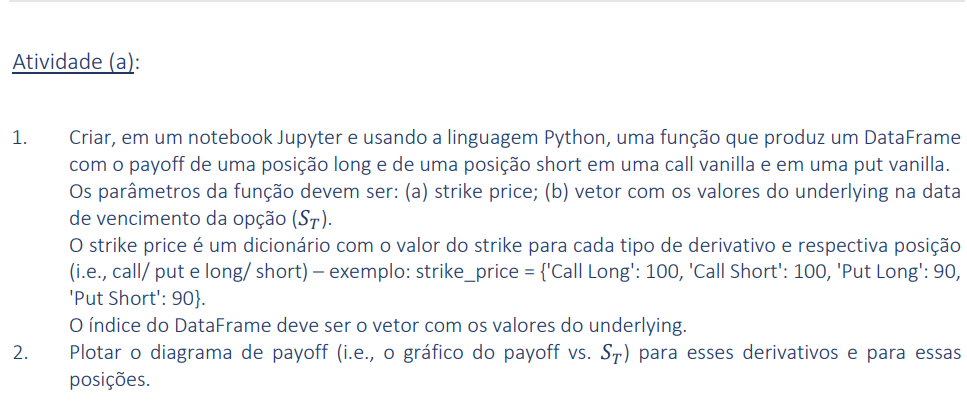

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

     Call Long  Call Short  Put Long  Put Short
50           0           0        30        -20
60           0           0        20        -10
70           0           0        10          0
80           0           0         0          0
90           0           0         0          0
100          0         -10         0          0
110         10         -20         0          0
120         20         -30         0          0
130         30         -40         0          0
140         40         -50         0          0


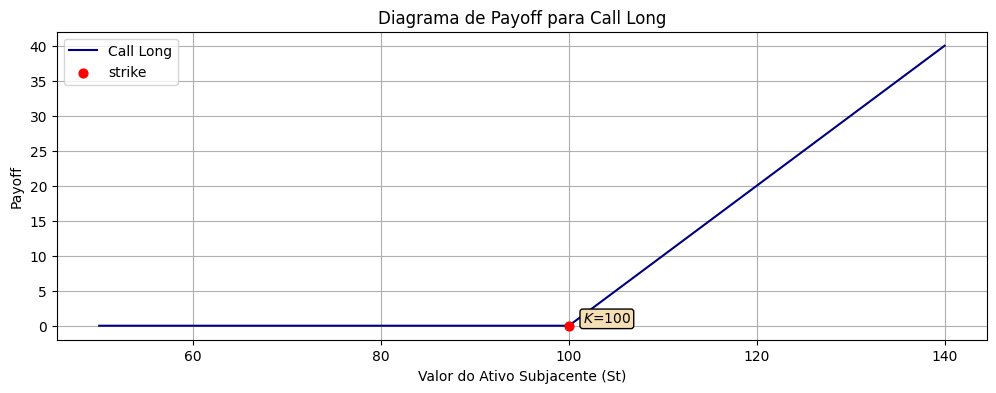

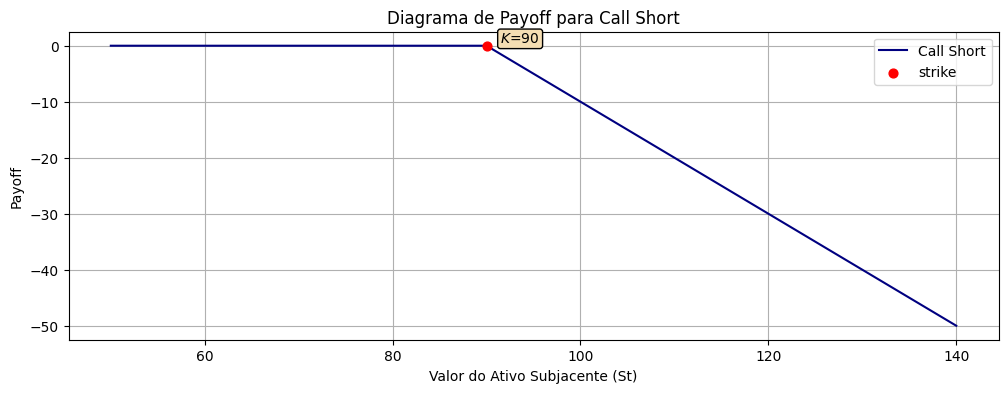

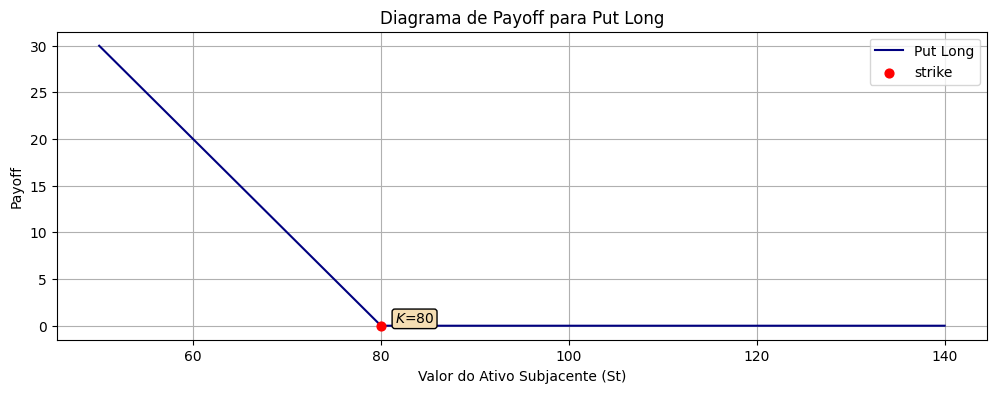

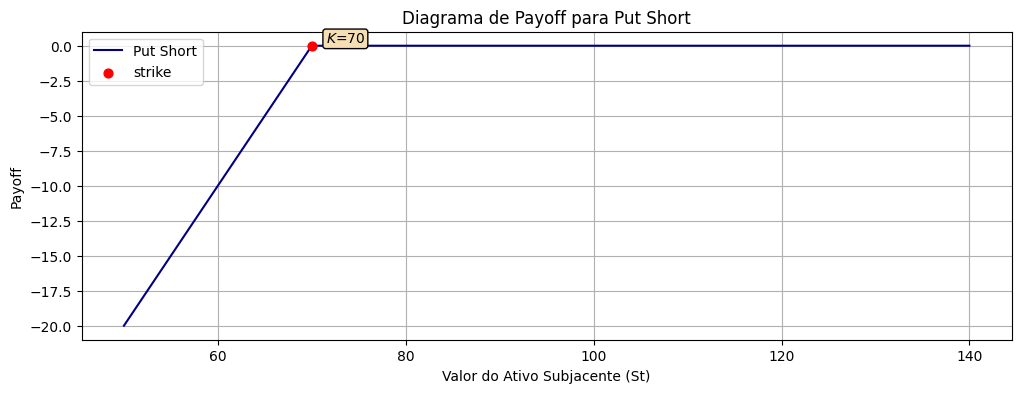

In [2]:
def payoff_opcoes(strike_price, underlying_price):
    # Função para calcular o payoff de uma opção de compra
    def call_payoff(strike, underlying_price):
        return max(0, underlying_price - strike)

    # Função para calcular o payoff de uma opção de venda
    def put_payoff(strike, underlying_price):
        return max(0, strike - underlying_price)

    payoffs = {}  # Dicionário para armazenar os payoffs

    # Loop para calcular payoffs para cada tipo de derivativo e posição
    for position, strike in strike_price.items():
        if 'Call' in position:  # Opção de compra
            if 'Long' in position:
                payoffs[position] = [call_payoff(strike, St) for St in underlying_price]
            elif 'Short' in position:
                payoffs[position] = [-call_payoff(strike, St) for St in underlying_price]

        elif 'Put' in position:  # Opção de venda
            if 'Long' in position:
                payoffs[position] = [put_payoff(strike, St) for St in underlying_price]
            elif 'Short' in position:
                payoffs[position] = [-put_payoff(strike, St) for St in underlying_price]

    # Cria um DataFrame a partir do dicionário de payoffs
    df = pd.DataFrame(payoffs, index=underlying_price)

    return df

# Valores de preço de exercício (strike price) para as opções
strike_price = {'Call Long': 100,
                'Call Short': 90,
                'Put Long': 80,
                'Put Short': 70
               }

# Valores do ativo subjacente (preço do ativo subjacente - St)
underlying_values = np.arange(50, 150, 10)

# Calcula os payoffs para as opções com base nos preços de exercício e valores do ativo subjacente
option_payoffs = payoff_opcoes(strike_price, underlying_values)
print(option_payoffs)

# Plotagem dos diagramas de payoff para cada opção
for position in option_payoffs.columns:
    strike = strike_price[position]
    plt.figure(figsize=(12, 4))
    plt.plot(option_payoffs.index, option_payoffs[position], c='navy', label=f'{position}')
    plt.scatter(strike, 0, c='r', s=40, label=f'strike', zorder=3)
    
    plt.annotate(f'$K$={strike}', (strike, 0),
                    textcoords="offset points",
                    xytext=(10, 10), ha='left', va='top',
                    bbox=dict(boxstyle='round, pad=0.2',
                    edgecolor='black', facecolor='wheat', alpha=1))
    plt.xlabel('Valor do Ativo Subjacente (St)')
    plt.ylabel('Payoff')
    plt.legend()
    plt.title(f'Diagrama de Payoff para {position}')
    plt.grid(True)
    plt.show()


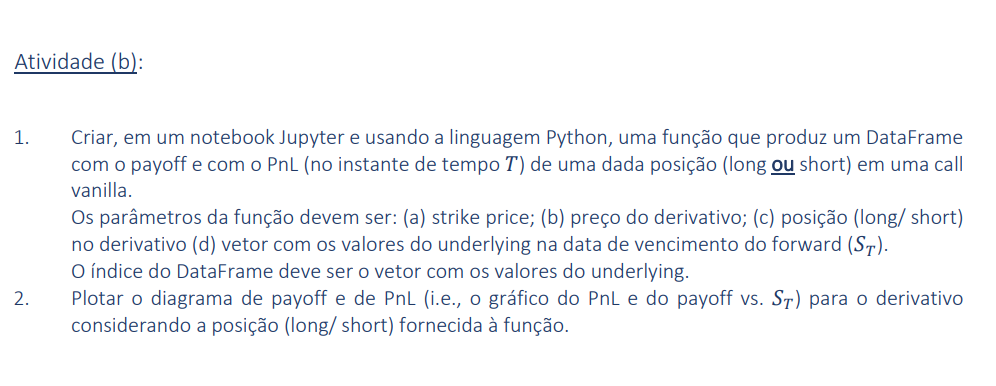

In [3]:
def plot_payoff(option_payoffs, strike, ct, position, type):
    
    plt.figure(figsize=(12, 4))
    plt.plot(option_payoffs.index, option_payoffs['payoffs'], c='navy',  ls='--', label=f'payoff')
    plt.plot(option_payoffs.index, option_payoffs['pnl'], c='orangered', label=f'pnl')
    plt.scatter(strike, 0, c='r', s=40, label=f'strike',zorder=3)
    if type == 'call':
        plt.scatter(strike+ct, 0, c='r', s=40, label=f'strike+ct',zorder=3)
        pts = [[(strike,0),f'$K$={strike}'], 
               [(strike+ct,0),f'$K+ct$={strike+ct}']
              ]
    else:
        plt.scatter(strike-ct, 0, c='r', s=40, label=f'strike-ct',zorder=3)
        pts = [[(strike,0),f'$K$={strike}'], 
               [(strike-ct,0),f'$K-ct$={strike-ct}']
              ]

    for pt in pts:
        plt.annotate(pt[1], pt[0],
                    textcoords="offset points",
                    xytext=(10, 10), ha='left', va='top',
                    bbox=dict(boxstyle='round, pad=0.2',
                    edgecolor='black', facecolor='wheat', alpha=1))
    
    plt.xlabel('Valor do Ativo Subjacente (St)')
    plt.ylabel('Payoff')
    plt.legend()
    plt.title(f'Diagrama de Payoff para {position} {type}')
    plt.grid(True)
    plt.show()

In [4]:
# Função para calcular payoffs e P&L de opções
def payoff_pnl_options(strike_price, underlying_price, type, position, ct):
    # Função para calcular o payoff de uma opção de compra
    def call_payoff(strike, underlying_price):
        return max(0, underlying_price - strike)

    # Função para calcular o payoff de uma opção de venda
    def put_payoff(strike, underlying_price):
        return max(0, strike - underlying_price)

    payoffs = None  # Variável para armazenar os payoffs
    pnl = None  # Variável para armazenar o P&L (Lucro e Perda)

    # Loop para calcular payoffs e P&L para opções de compra ou venda
    if type == 'call':
        if position == 'long':
            # Calcula os payoffs de opção de compra longa e o P&L
            payoffs = np.array([call_payoff(strike_price['Call Long'], St) for St in underlying_price])
            pnl = payoffs - ct
        elif position == 'short':
            # Calcula os payoffs de opção de compra curta e o P&L
            payoffs = np.array([-call_payoff(strike_price['Call Short'], St) for St in underlying_price])
            pnl = payoffs + ct

    elif type == 'put':  # Opção de venda
        if position == 'long':
            # Calcula os payoffs de opção de venda longa e o P&L
            payoffs = np.array([put_payoff(strike_price['Put Long'], St) for St in underlying_price])
            pnl = payoffs - ct
        if position == 'short':
            # Calcula os payoffs de opção de venda curta e o P&L
            payoffs = np.array([-put_payoff(strike_price['Put Short'], St) for St in underlying_price])
            pnl = payoffs + ct

    # Cria um DataFrame a partir dos payoffs e P&L
    df = pd.DataFrame({'payoffs': payoffs, 'pnl': pnl}, index=underlying_price)

    return df

ct = 10  # Custo total
underlying_values = np.arange(50, 150, 10)  # Valores do ativo subjacente


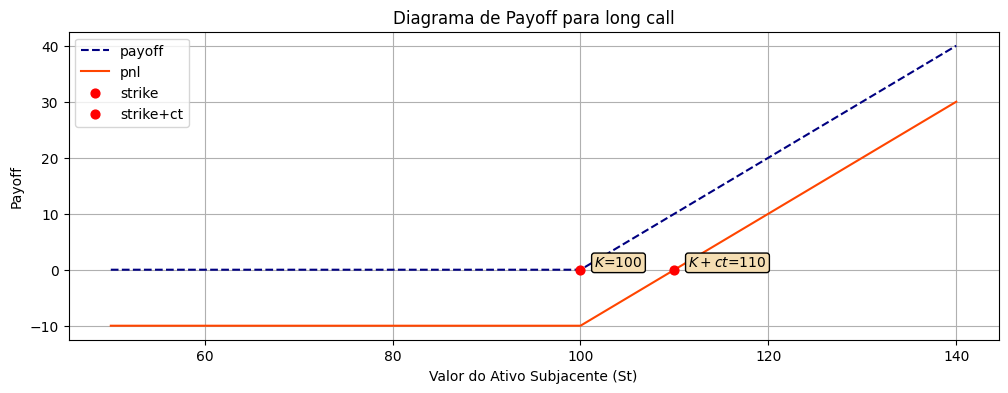

In [5]:
type = 'call'
position = 'long'
strike = strike_price['Call Long']

option_payoffs = payoff_pnl_options(strike_price, underlying_values, type, position, ct)
# Plotagem dos diagramas de payoff
plot_payoff(option_payoffs, strike, ct, position, type)

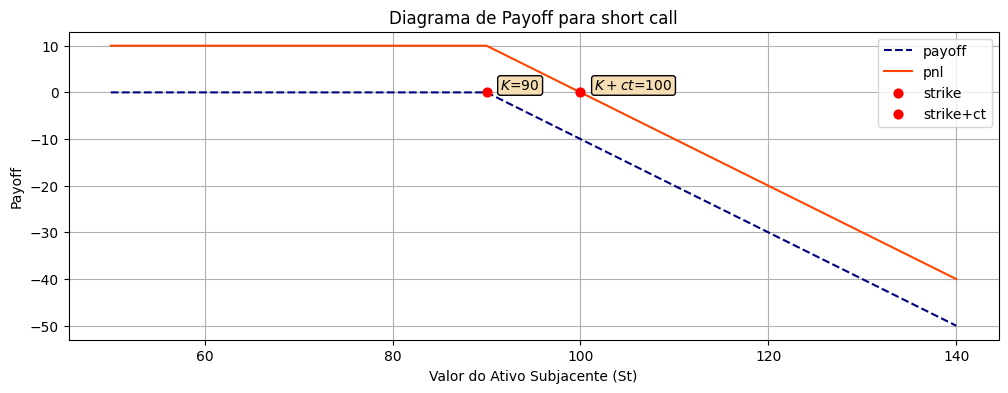

In [6]:
type = 'call'
position = 'short'
strike = strike_price['Call Short']
option_payoffs = payoff_pnl_options(strike_price, underlying_values, type, position, ct)

# Plotagem dos diagramas de payoff
plot_payoff(option_payoffs, strike, ct, position, type)

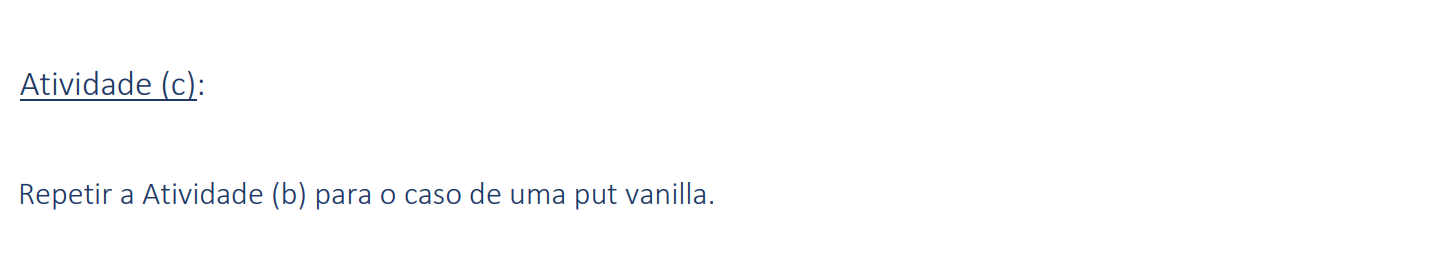

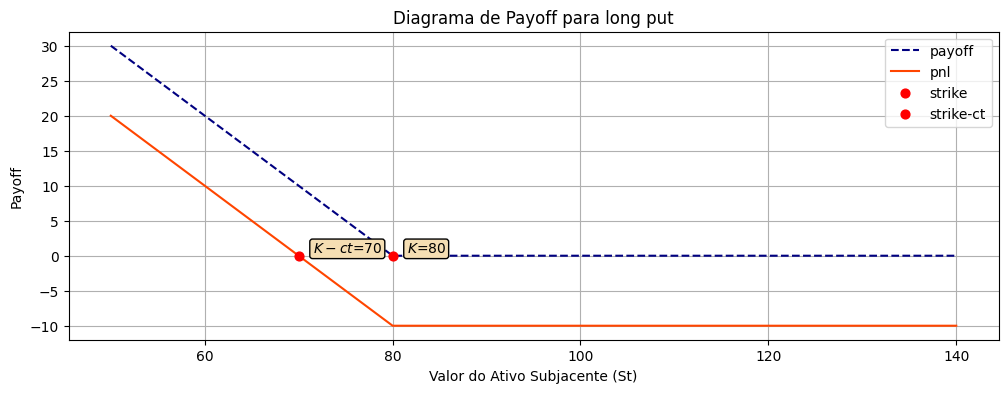

In [7]:
type = 'put'
position = 'long'
strike = strike_price['Put Long']

option_payoffs = payoff_pnl_options(strike_price, underlying_values, type, position, ct)

# Plotagem dos diagramas de payoff
plot_payoff(option_payoffs, strike, ct, position, type)

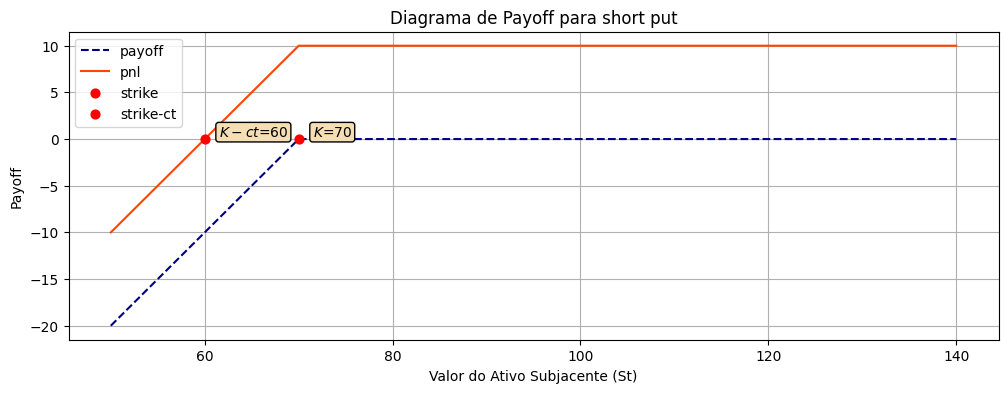

In [8]:
type = 'put'
position = 'short'
strike = strike_price['Put Short']

option_payoffs = payoff_pnl_options(strike_price, underlying_values, type, position, ct)

# Plotagem dos diagramas de payoff
plot_payoff(option_payoffs, strike, ct, position, type)

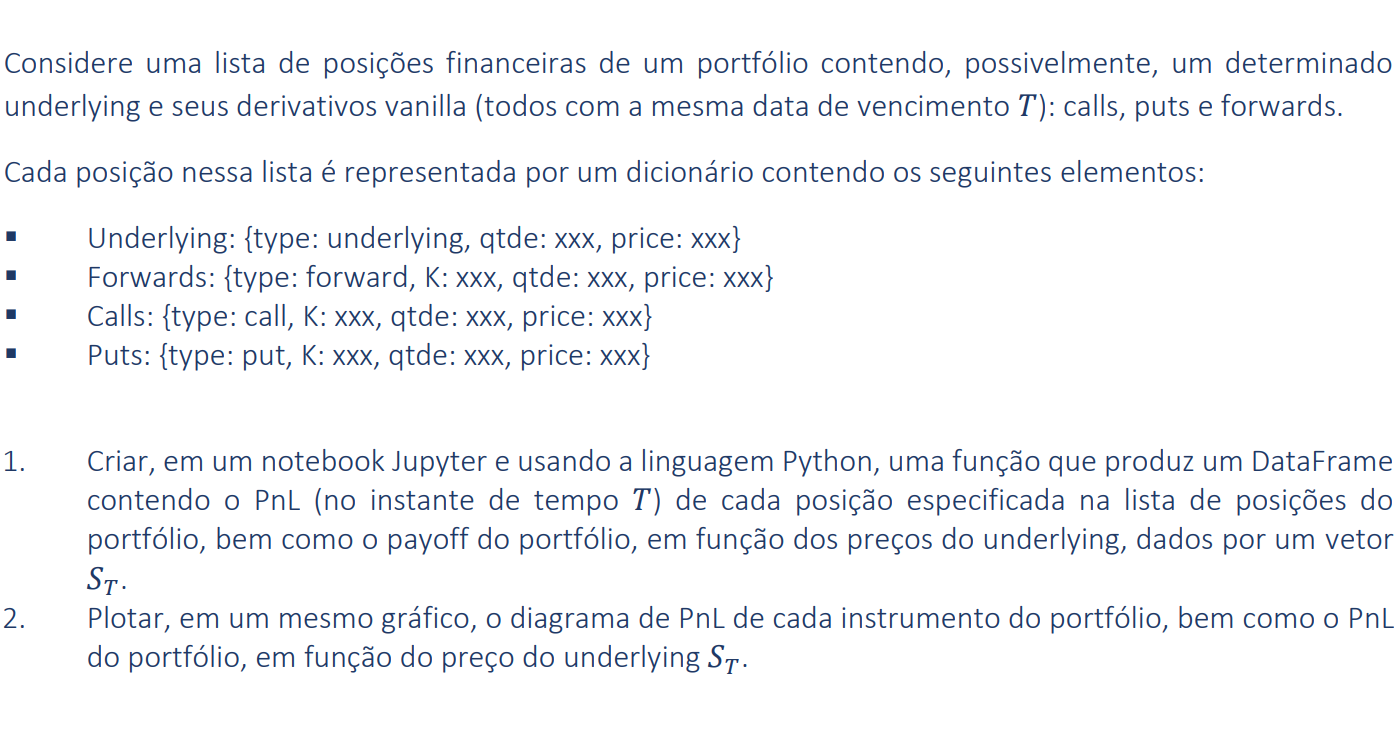

In [9]:
ct = 10  # Custo total
strike = 100  # Preço de exercício da opção
underlying_values = np.arange(50, 160, 1)  # Valores do ativo subjacente

r = 0.02
T = 1
S0 = 100
forward_price = S0 * np.exp(r * T)
forward_price

# Definição do portfólio
portfolio = {
    'underlying': {'type': 'underlying', 'size': 10, 'price': 100},
    'forward': {'type': 'forward', 'K': 100 * np.exp(r * T), 'size': 10, 'price': 0},
    'call': {'type': 'call', 'K': 110, 'size': 10, 'price': 15},
    'put': {'type': 'put', 'K': 110, 'size': 20, 'price': 5}
}

def portfolio_pnl(portfolio, underlying_price):
    # Função para calcular o P&L de uma opção de compra
    def call_pnl(call, underlying_price):
        strike = call['K']
        option_price = call['price']
        pnl = max(0, underlying_price - strike) - option_price
        return pnl

    # Função para calcular o P&L de uma opção de venda
    def put_pnl(put, underlying_price):
        strike = put['K']
        option_price = put['price']
        pnl = max(0, strike - underlying_price) - option_price
        return pnl

    def underlying_pnl(underlying, underlying_price):
        underlying_cost = underlying['price']
        pnl = underlying_price - underlying_cost
        return pnl

    def forward_pnl(forward, underlying_price):
        forward_price = forward['K']
        payoff = underlying_price - forward_price
        pnl = payoff
        return pnl

    pnl_functions = {
        'call': call_pnl,
        'put': put_pnl,
        'underlying': underlying_pnl,
        'forward': forward_pnl
    }

    pnls = {}  # Dicionário para armazenar os P&Ls
    for position in portfolio.values():
        
        position_type = position['type']
        pnl_f = pnl_functions[position_type]
        
        pnl = np.array([pnl_f(position, st) for st in underlying_price])
        pnls[position_type] = pnl * position['size']

    # Cria um DataFrame a partir do dicionário de P&Ls
    df = pd.DataFrame(pnls, index=underlying_price)
    df['portfolio'] = df.sum(axis=1)

    return df

portfolio_pnl_df = portfolio_pnl(portfolio, underlying_values)


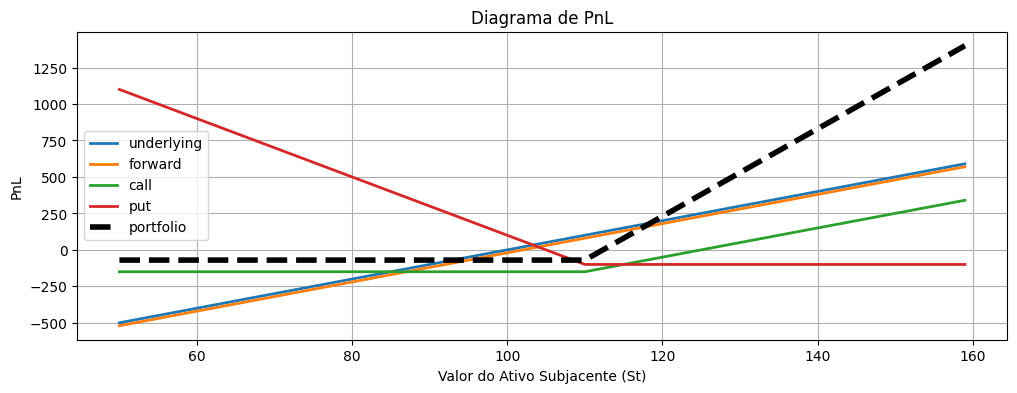

In [10]:
plt.figure(figsize=(12, 4))
plt.plot(portfolio_pnl_df.index, portfolio_pnl_df[list(portfolio.keys())], label=list(portfolio.keys()), lw=2)
plt.plot(portfolio_pnl_df.index, portfolio_pnl_df['portfolio'], label='portfolio', lw=4, ls='--', c='k')

plt.xlabel('Valor do Ativo Subjacente (St)')
plt.ylabel('PnL')
plt.legend()
plt.title(f'Diagrama de PnL')
plt.grid(True)
plt.show()